In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.2.0
60000


In [4]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [7]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=5100   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor0/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock0/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper0/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 5100 입니다.
x_train shape: (5100, 28, 28, 3)
y_train shape: (5100,)


라벨:  0


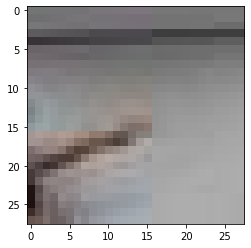

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[180])
print('라벨: ', y_train[180])

라벨:  0


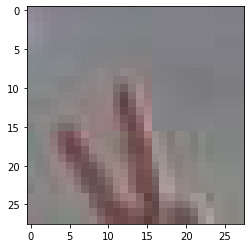

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1180])
print('라벨: ', y_train[1180])

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
160/160 [==============================] - 3s 17ms/step - loss: 3.3417 - accuracy: 0.5367
Epoch 2/10
160/160 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.7445
Epoch 3/10
160/160 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.8120
Epoch 4/10
160/160 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8531
Epoch 5/10
160/160 [==============================] - 0s 1ms/step - loss: 0.2908 - accuracy: 0.8863
Epoch 6/10
160/160 [==============================] - 0s 1ms/step - loss: 0.2346 - accuracy: 0.9078
Epoch 7/10
160/160 [==============================] - 0s 1ms/step - loss: 0.1839 - accuracy: 0.9327
Epoch 8/10
160/160 [==============================] - 0s 1ms/step - loss: 0.1409 - accuracy: 0.9524
Epoch 9/10
160/160 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9606
Epoch 10/10
160/160 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.964

In [12]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300  # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissorJH/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rockjh/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paperjh/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("test데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

test데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [13]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.4313 - accuracy: 0.8467
test_loss: 0.4313412010669708 
test_accuracy: 0.846666693687439


제가 정말 열심히 했습니다. 많은 시행착오를 거쳤고요. 처음엔 데이터셋을 300개에서 조원들것을 합쳐 1800개로 만들었고, 타 조원들 것을 합쳐 5100개에 이르렀습니다. 하지만 계속 LMS 상에서 에러가 나고 코치님께 질문 세례를 해가며 계속 코드를 수정하고 보완하는 작업을 하면서 많은 것을 느꼈습니다. 코치님들이 제가 어디 틀린지 대번에 알아내시는 것을 보며 정말 역량이 다르다 느꼈고 존경심이 팍팍 생겼습니다. 정말 어느것 하나 쉬운 것이 없었고 많은 실패 끝에 드디어 성공율을 올리게 되면서 안도의 한숨과 심장을 누르던 마음의 짐을 벗어던지게 되었습니다. 소감문을 작성하는 것을 권유하셔서 이렇게 작성합니다. 많이 가르쳐주신 코치님 두분께 감사드립니다.